<a href="https://colab.research.google.com/github/Rakesh33333/NLP-Hackathon-1.0/blob/main/NLP%20hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
# Make sure to import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import torch.optim as optim
from tqdm import tqdm

In [ ]:
dataset_path = '/content/legal_text_classification.csv'
df = pd.read_csv(dataset_path)

df.dropna(inplace=True)

label_encoder = LabelEncoder()
df['case_outcome_encoded'] = label_encoder.fit_transform(df['case_outcome'])

class_counts = df['case_outcome_encoded'].value_counts()
print("Class distribution in training data:\n", class_counts)

Class distribution in training data:
 case_outcome_encoded
3    12110
8     4363
1     2438
7     2252
4     1699
5     1018
6      603
9      112
2      108
0      106
Name: count, dtype: int64


In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['case_outcome_encoded'], random_state=42)

majority_class_size = train_df['case_outcome_encoded'].value_counts().max()
train_df_balanced = train_df.groupby('case_outcome_encoded', group_keys=False) \
                            .apply(lambda x: x.sample(majority_class_size, replace=True)).reset_index(drop=True)

balanced_class_counts = train_df_balanced['case_outcome_encoded'].value_counts()
print("Class distribution after oversampling:\n", balanced_class_counts)

Class distribution after oversampling:
 case_outcome_encoded
0    9688
1    9688
2    9688
3    9688
4    9688
5    9688
6    9688
7    9688
8    9688
9    9688
Name: count, dtype: int64


<ipython-input-10-367d2340d4f2>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(majority_class_size, replace=True)).reset_index(drop=True)


In [ ]:
legalbert_model_name = 'nlpaueb/legal-bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(legalbert_model_name)
model = BertForSequenceClassification.from_pretrained(legalbert_model_name, num_labels=len(label_encoder.classes_))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import classification_report
import numpy as np
from tqdm import tqdm
from torch.cuda.amp import GradScaler, autocast
from torch_optimizer import Lamb  # Faster optimizer

In [ ]:
max_length = 128  # Reduced sequence length for faster processing
stride = 32  # Reduced stride
batch_size = 32  # Increased batch size for faster training
epochs = 1  # Reduced number of epochs
learning_rate = 2e-5
weight_decay = 0.01
gradient_accumulation_steps = 2  # For simulating larger batch sizes

In [ ]:
# Assuming you have a custom dataset class `LegalDataset`
train_dataset = LegalDataset(train_df_balanced, tokenizer, max_length, stride)
val_dataset = LegalDataset(val_df, tokenizer, max_length, stride)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the number of classes from your LabelEncoder
num_classes = len(label_encoder.classes_)

# Use a smaller model for faster training
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
model.to(device)

# Use LAMB optimizer for faster convergence
optimizer = Lamb(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    correct_predictions = 0
    y_preds = []
    y_true = []

    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            losses.append(loss.item())
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels).item()
            y_preds.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    return correct_predictions / len(data_loader.dataset), np.mean(losses), y_true, y_preds

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, device, num_epochs=3):
    scaler = GradScaler()  # For mixed precision
    best_accuracy = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        model = model.train()
        train_losses = []
        correct_predictions = 0

        for i, d in enumerate(tqdm(train_loader)):
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)

            optimizer.zero_grad()

            with autocast():  # Mixed precision
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

            scaler.scale(loss).backward()  # Scale loss and backpropagate

            if (i + 1) % gradient_accumulation_steps == 0:
                scaler.step(optimizer)  # Update weights
                scaler.update()  # Update scaler
                optimizer.zero_grad()

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels).item()
            train_losses.append(loss.item())

        train_acc = correct_predictions / len(train_loader.dataset)
        train_loss = np.mean(train_losses)
        print(f'Train loss: {train_loss}, Train accuracy: {train_acc}')

        # Evaluate on validation set
        val_acc, val_loss, y_true, y_preds = eval_model(model, val_loader, device)
        print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')
        print(classification_report(y_true, y_preds, target_names=label_encoder.classes_))

        # Save the best model
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best validation accuracy: {best_accuracy}')

In [ ]:
train_model(model, train_loader, val_loader, optimizer, device, num_epochs=epochs)

<ipython-input-46-92dae9aff717>:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed precision


Epoch 1/1


  0%|          | 0/3028 [00:00<?, ?it/s]<ipython-input-46-92dae9aff717>:18: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision
100%|██████████| 3028/3028 [26:06<00:00,  1.93it/s]


Train loss: 1.7321730737169636, Train accuracy: 0.35539843104872004


100%|██████████| 156/156 [01:08<00:00,  2.28it/s]


Validation loss: 2.1218417508479877, Validation accuracy: 0.10459492140266022
               precision    recall  f1-score   support

     affirmed       0.21      0.62      0.32        21
      applied       0.12      0.10      0.11       488
     approved       0.01      0.38      0.01        21
        cited       0.53      0.10      0.17      2422
   considered       0.09      0.06      0.07       340
    discussed       0.06      0.03      0.04       204
distinguished       0.04      0.50      0.07       121
     followed       0.13      0.03      0.05       450
  referred to       0.16      0.10      0.12       873
      related       0.05      0.50      0.10        22

     accuracy                           0.10      4962
    macro avg       0.14      0.24      0.11      4962
 weighted avg       0.32      0.10      0.13      4962

Best validation accuracy: 0.10459492140266022


In [5]:
def extract_features(dataset):
    features = []
    labels = []
    for d in dataset:
        features.append(d['input_ids'].numpy())
        labels.append(d['labels'].numpy())
    return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_dataset)
X_val, y_val = extract_features(val_dataset)

# Flatten the features for traditional ML models
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

NameError: name 'train_dataset' is not defined

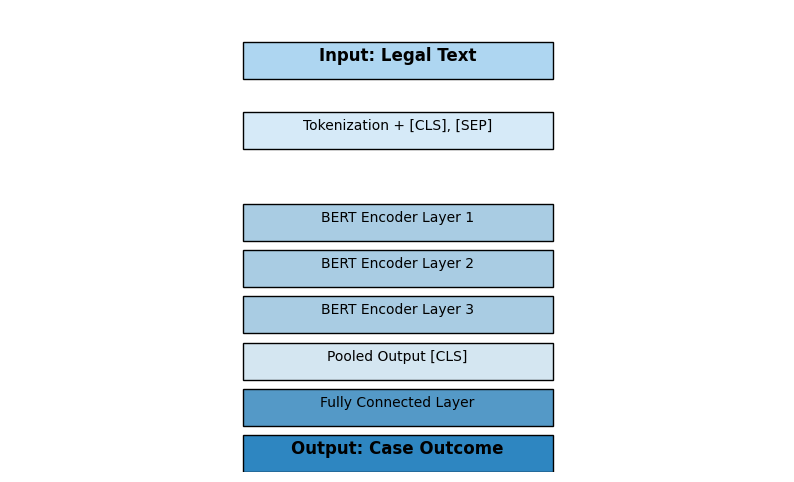

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bert_architecture():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Input Layer
    ax.text(5, 9, 'Input: Legal Text', ha='center', va='center', fontsize=12, fontweight='bold')
    ax.add_patch(patches.Rectangle((3, 8.5), 4, 0.8, edgecolor='black', facecolor='#AED6F1'))

    # Tokenization
    ax.text(5, 7.5, 'Tokenization + [CLS], [SEP]', ha='center', va='center', fontsize=10)
    ax.add_patch(patches.Rectangle((3, 7), 4, 0.8, edgecolor='black', facecolor='#D6EAF8'))

    # BERT Encoder Layers
    for i in range(5, 2, -1):
        ax.text(5, i + 0.5, f'BERT Encoder Layer {6 - i}', ha='center', va='center', fontsize=10)
        ax.add_patch(patches.Rectangle((3, i), 4, 0.8, edgecolor='black', facecolor='#A9CCE3'))

    # Classification Head
    ax.text(5, 2.5, 'Pooled Output [CLS]', ha='center', va='center', fontsize=10)
    ax.add_patch(patches.Rectangle((3, 2), 4, 0.8, edgecolor='black', facecolor='#D4E6F1'))

    ax.text(5, 1.5, 'Fully Connected Layer', ha='center', va='center', fontsize=10)
    ax.add_patch(patches.Rectangle((3, 1), 4, 0.8, edgecolor='black', facecolor='#5499C7'))

    # Output Layer
    ax.text(5, 0.5, 'Output: Case Outcome', ha='center', va='center', fontsize=12, fontweight='bold')
    ax.add_patch(patches.Rectangle((3, 0), 4, 0.8, edgecolor='black', facecolor='#2E86C1'))

    plt.show()

# Call the function to plot
plot_bert_architecture()


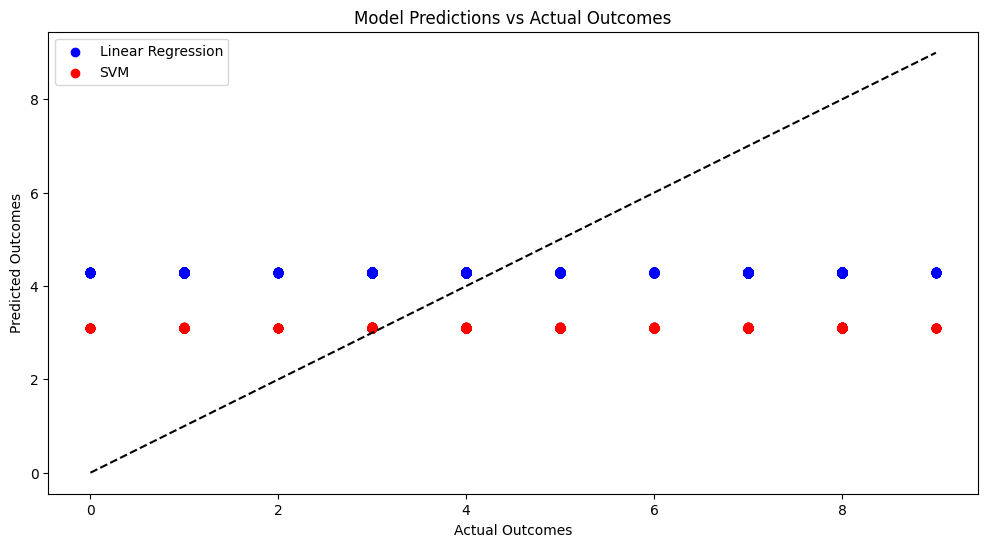

Linear Regression - MSE: 5.211236479892045
Linear Regression - R^2: -0.00032344456424016066
SVM - MSE: 6.512086965220106
SVM - R^2: -0.2500283357867905


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/legal_text_classification.csv')
data = data.dropna()

# Extract numbers from 'case_id'
data['case_id_num'] = data['case_id'].str.extract('(\d+)').astype(int)

# Feature and target selection
X = data[['case_id_num']]  # Numerical case_id
y = data['case_outcome'].astype('category').cat.codes  # Encode categorical labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# SVM Regression
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_preds, color='blue', label='Linear Regression')
plt.scatter(y_test, svm_preds, color='red', label='SVM')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel('Actual Outcomes')
plt.ylabel('Predicted Outcomes')
plt.title('Model Predictions vs Actual Outcomes')
plt.legend()
plt.show()

# Metrics
print("Linear Regression - MSE:", mean_squared_error(y_test, lr_preds))
print("Linear Regression - R^2:", r2_score(y_test, lr_preds))
print("SVM - MSE:", mean_squared_error(y_test, svm_preds))
print("SVM - R^2:", r2_score(y_test, svm_preds))
